<a href="https://colab.research.google.com/github/ZebaFatima639/Data-Cleaning-Data-Preprocessing/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.shape

(569, 32)

In [18]:
X = df.drop(['id', 'diagnosis'], axis=1)
Y = df['diagnosis']

In [10]:
X.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [11]:
Y.head()

,perimeter_mean
0,122.80
1,132.90
2,130.00
3,77.58
4,135.10


In [12]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [14]:
print("Training data :",X_train.shape)
print("Training data :",Y_train.shape)

Training data : (426, 2)
Training data : (426,)


In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [24]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

#predicting test set results
Y_pred = classifier.predict(X_test)

In [26]:
Y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[88,  2],
       [ 2, 51]])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.972027972027972

In [40]:
from sklearn.svm import SVC
#classifier = SVC(kernel ='rbf',gamma=10,random_state=0)
classifier = SVC(kernel = 'rbf', gamma=15, C=7, random_state = 0)
classifier.fit(X_train, Y_train)

#predicting test set results
Y_pred = classifier.predict(X_test)


In [41]:
from sklearn import metrics

print('accuracy score on test data: with default rbf kernel')
print(metrics.accuracy_score(Y_test, Y_pred))

accuracy score on test data: with default rbf kernel
0.6293706293706294


In [42]:
svc = SVC(kernel='poly',degree = 4)
svc.fit(X_train, Y_train)

y_pred = svc.predict(X_test)
print('Accuracy score: with poly kernel and degree')
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy score: with poly kernel and degree
0.6293706293706294


/tmp/ipython-input-3658673185.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_test_numeric = Y_test.replace({'M': 1, 'B': 0}).infer_objects(copy=False).values


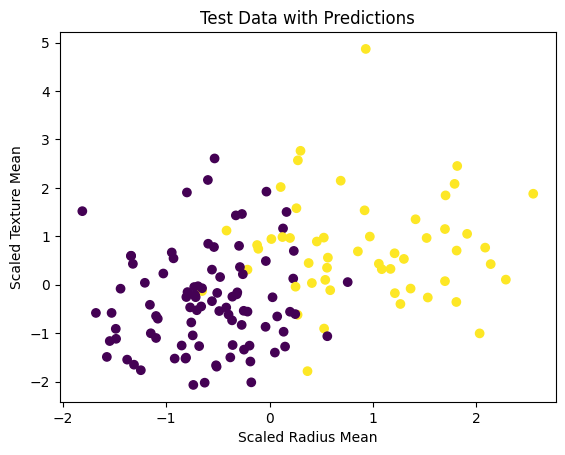

In [50]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for converting pandas Series to numpy array

# Convert Y_test to numerical labels for plotting
Y_test_numeric = Y_test.replace({'M': 1, 'B': 0}).infer_objects(copy=False).values

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_numeric, cmap='viridis') # Using two features for plotting
plt.xlabel('Scaled Radius Mean') # Update label to reflect scaled feature
plt.ylabel('Scaled Texture Mean') # Update label to reflect scaled feature
plt.title('Test Data with Predictions') # Updated title
plt.show()

In [59]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

#predicting test set results
Y_pred = classifier.predict(X_test)

/tmp/ipython-input-1252459105.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_pred_numeric = pd.Series(Y_pred).replace({'M': 1, 'B': 0}).values


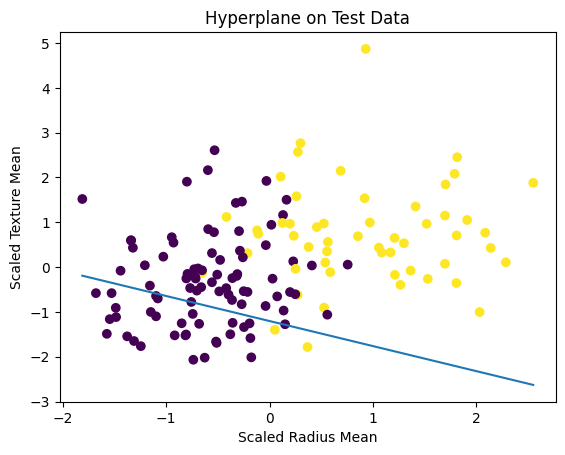

In [61]:
#plot data points
Y_pred_numeric = pd.Series(Y_pred).replace({'M': 1, 'B': 0}).values
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred_numeric, cmap='viridis')

#create hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_test[:, 0].min(), X_test[:, 0].max()) # Adjust linspace range based on X_test
yy = a * xx - (classifier.intercept_[0]) / w[1]

#plot the hyperplane
plt.plot(xx, yy)
plt.title('Hyperplane on Test Data') # Updated title
plt.xlabel('Scaled Radius Mean') # Add x-axis label
plt.ylabel('Scaled Texture Mean') # Add y-axis label
plt.show()